# Stock Market Analysis (FAANG + Microsoft)

In this project, I will analyse stock market data for some technology stocks using Python. In particular, I will leverage various Python libraries (such as pandas, numpy, matplotlib and seaborn) to get stock data, create visualizations, analyze correlations, analyze risk, and predict future stock prices.

I'll try to answer the following questions:

    1.) What was the historical price changes for the stocks?
    2.) What was the average daily return for the stocks?
    3.) What was the moving average for the stocks?
    4.) What was the correlation between the stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

### Table of Contents

* [Section 1: Data preparation and basic analysis](#chapter1)
    * [Section 1.1: Import required dependencies](#section1.1)
    * [Section 1.2: Download and Explore the Dataset](#section1.2)
    * [Section 1.3: Plot out the volume and closing price](#section1.3)
    * [Section 1.4: Moving Average](#section1.4)
* [Section 2: Daily Return & Correlation Analysis](#chapter2)
    * [Section 2.1: Correlation between the stocks' daily returns](#section2.1)
* [Section 3: Risk](#chapter3)
    * [Section 3.1: Value at Risk](#section3.1)
        * [Section 3.1.1: Value at Risk using the historical bootstrap method](#section3.1.1)
        * [Section 3.1.2: Value at Risk using the variance-covariance method](#section3.1.2)
        * [Section 3.1.3: Value at Risk using the Monte Carlo method](#section3.1.3)

# Section 1: Data preparation and basic analysis <a class="anchor" id="chapter1"></a>
This sections include how to handle stock information with pandas, and how to do basic analysis of a stock's historical price and volume development.

## Section 1.1: Import required dependencies <a class="anchor" id="section1.1"></a>

First, let’s import our required dependencies.

In [1]:
#For data analysis
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#display graphs directly below the code cell that produced it
%matplotlib inline

# For stock data import
#conda install -c anaconda pandas-datareader #uncomment this line if you haven't installed pandas datareader
import pandas_datareader.data as web

# To show the correlation coefficient and p-value 
import scipy.stats as stats

# For time stamps
from datetime import datetime, timedelta

# Required for Python version 2.x, will change the / operator to mean true division as implemented in Python 3.0.
#from __future__ import division #uncomment this line if you run Python 2.x

## Section 1.2: Download and Explore the Dataset <a class="anchor" id="chapter1.2"></a>

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# A list of the ticker symbols for the stocks I'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN','NFLX','FB']

# Set up End and Start times for data grab
#end_date = datetime.now()
end_date = datetime.now()
start_date = datetime(end_date.year - 1,month=1, day=1)

print(f'start date = {start_date}')
print(f'end date = {end_date}')

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start_date,end_date)

start date = 2019-01-01 00:00:00
end date = 2020-12-05 23:41:44.314769


Let's have a quick look at the AAPL DataFrame

In [3]:
AAPL.head().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.71,38.56,38.72,39.48,148158800.0,38.25
2019-01-03,36.43,35.50,35.99,35.55,365248800.0,34.44
2019-01-04,37.14,35.95,36.13,37.06,234428400.0,35.91
2019-01-07,37.21,36.47,37.17,36.98,219111200.0,35.83
2019-01-08,37.96,37.13,37.39,37.69,164101200.0,36.51


The adjusted closing price ("__Adj Close__") amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance (Source: https://www.investopedia.com/terms/a/adjusted_closing_price.asp).

Let's apply the __describe__ function to get some basic statistical details like percentiles, mean, std etc.

In [4]:
# Summary statistics
AAPL.describe().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close
count,487.00,487.00,487.00,487.00,4.870000e+02,487.00
mean,72.56,70.79,71.64,71.73,1.307927e+08,70.86
std,26.10,25.15,25.71,25.63,6.646178e+07,26.01
min,36.43,35.50,35.99,35.55,2.019780e+07,34.44
25%,51.02,50.18,50.54,50.67,8.891020e+07,49.43
50%,66.52,65.27,65.92,66.04,1.144304e+08,64.94
75%,88.03,85.03,87.15,86.71,1.558620e+08,86.41
max,137.98,130.53,137.59,134.18,4.268848e+08,133.95


In [5]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2019-01-02 to 2020-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       487 non-null    float64
 1   Low        487 non-null    float64
 2   Open       487 non-null    float64
 3   Close      487 non-null    float64
 4   Volume     487 non-null    float64
 5   Adj Close  487 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


## Section 1.3: Plot out the volume and closing price <a class="anchor" id="chapter1.3"></a>

Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

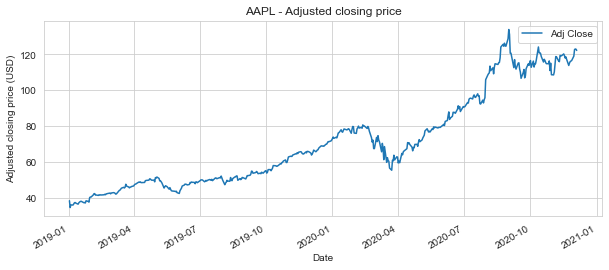

In [6]:
# Let's see a historical view of the closing price
AAPL_adj_close = AAPL['Adj Close'].plot(legend=True,figsize=(10,4),title="AAPL - Adjusted closing price")

# Add appropriate axis labels
AAPL_adj_close.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

Now that we've seen the development of the adjusted closing price, let's plot the Daily volume (i.e. how many shares are traded each day).

[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Date')]

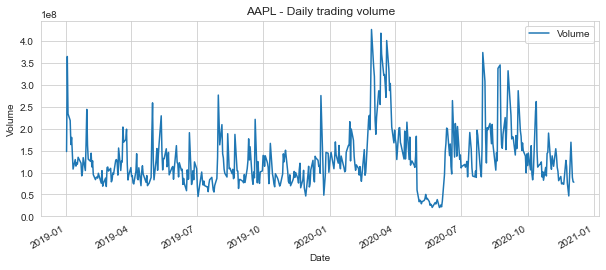

In [7]:
# Now let's plot the daily volume, i.e. how many AAPL shares are traded each day
AAPL_vol = AAPL['Volume'].plot(legend=True,figsize=(10,4),title="AAPL - Daily trading volume")

# Add appropriate axis labels
AAPL_vol.set(xlabel="Date", ylabel="Volume")

The Daily volume can be averaged over a number of days (typically over 20 or 30 days) to find the average daily trading volume (ADTV), i.e. the average number of shares traded within a day in a given stock. ADTV is an important metric because high or low trading volume attracts different types of traders and investors. Many traders and investors prefer higher ADTV compared to low trading volume, because with high volume it is easier to get into and out positions. Low volume assets have fewer buyers and sellers, and therefore it may be harder to enter or exit at a desired price (Source: https://www.investopedia.com/terms/a/averagedailytradingvolume.asp).

In [8]:
# Let's add a 30 days Average Daily Trading Volume metric
AAPL['ADTV'] = AAPL['Volume'].rolling(window=30,center=False).mean()
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV
Date,,,,,,,
2020-11-30,120.97,116.81,116.97,119.05,169410200.0,119.05,1.108967e+08
2020-12-01,123.47,120.01,121.01,122.72,128166800.0,122.72,1.111476e+08
2020-12-02,123.37,120.89,122.02,123.08,89004200.0,123.08,1.099670e+08
2020-12-03,123.78,122.21,123.52,122.94,78967600.0,122.94,1.096010e+08
2020-12-04,122.86,121.52,122.60,122.25,78133200.0,122.25,1.088059e+08


[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Date')]

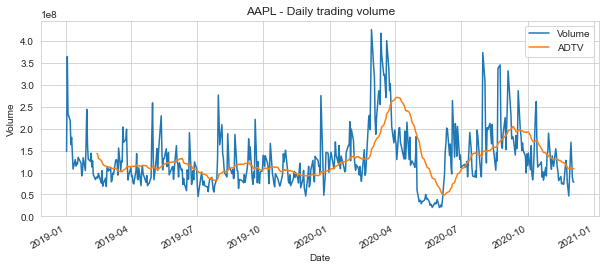

In [9]:
# Now let's plot the daily volume, i.e. how many AAPL shares are traded each day
AAPL_vol_avg = AAPL[['Volume','ADTV']].plot(legend=True,figsize=(10,4),title="AAPL - Daily trading volume")

# Add appropriate axis labels
AAPL_vol_avg.set(xlabel="Date", ylabel="Volume")

## Section 1.4: Moving Average <a class="anchor" id="chapter1.4"></a>

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

* A moving average (MA) is a stock indicator that is commonly used in technical analysis.
* The reason for calculating the moving average of a stock is to help smooth out the price data (i.e. by filtering out the “noise” from random short-term price fluctuations) over a specified period of time by creating a constantly updated average price.
* MAs can be constructed in several different ways, and employ different numbers of days for the averaging interval. The most common time periods used in moving averages are 15, 20, 30, 50, 100, and 200 days. The shorter the time span used to create the average, the more sensitive it will be to price changes. The longer the time span, the less sensitive the average will be. The 50-day and 200-day moving average figures for stocks are widely followed by investors and traders and are considered to be important trading signals.
* The most common applications of MAs are to identify trend direction and to determine support and resistance levels. When asset prices cross over their MAs, it may generate a trading signal for technical traders
* A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.
* Exponential moving averages (EMA) is a weighted average that gives greater importance to the price of a stock on more recent days, making it an indicator that is more responsive to new information. If you plot a 50-day SMA and a 50-day EMA on the same chart, you'll notice that the EMA reacts more quickly to price changes than the SMA does, due to the additional weighting on recent price data.

Sources:
* https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
* http://www.investopedia.com/terms/m/movingaverage.asp

#### Simple moving average (SMA)

In [10]:
# Let's go ahead and plot out several moving averages
ma_day = [20,50,200]

for ma in ma_day:
    column_name = "%s-days SMA" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV,20-days SMA,50-days SMA,200-days SMA
Date,,,,,,,,,,
2020-11-30,120.97,116.81,116.97,119.05,169410200.0,119.05,1.108967e+08,116.79,115.70,93.97
2020-12-01,123.47,120.01,121.01,122.72,128166800.0,122.72,1.111476e+08,117.49,115.96,94.19
2020-12-02,123.37,120.89,122.02,123.08,89004200.0,123.08,1.099670e+08,118.14,116.19,94.40
2020-12-03,123.78,122.21,123.52,122.94,78967600.0,122.94,1.096010e+08,118.54,116.51,94.62
2020-12-04,122.86,121.52,122.60,122.25,78133200.0,122.25,1.088059e+08,118.72,116.80,94.85


Now let's go ahead and plot all the additional Moving Averages

[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

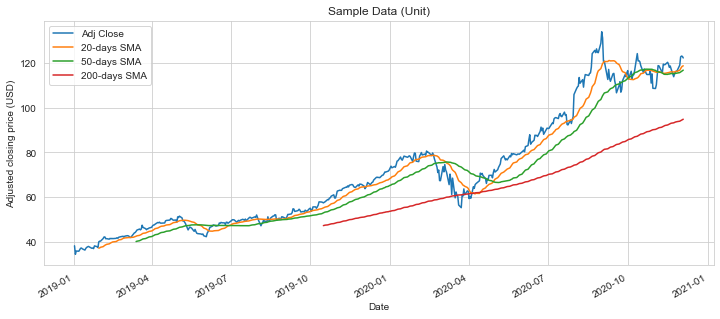

In [12]:
ax = AAPL[['Adj Close','20-days SMA','50-days SMA','200-days SMA']].plot(subplots=False,figsize=(12,5),title="Sample Data (Unit)")
ax.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries. However, this comes at a cost. SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days.

How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly M/2 days. Thus, if we are using a 100 days SMA, this means we may be late by almost 50 days, which can significantly affect our strategy.

#### Exponential Moving Average (EMA)

One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA). The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by 1/M. Using Pandas, calculating the exponential moving average is easy. We need to provide a lag value, from which the decay parameter α is automatically calculated.

In [13]:
# Let's go ahead and plot out several moving averages
# Span (i.e. the length of the window) corresponds to what is commonly called an “N-day EW moving average”.
AAPL['20-days EMA'] = AAPL['Adj Close'].ewm(span=20, adjust=False).mean()
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV,20-days SMA,50-days SMA,200-days SMA,20-days EMA
Date,,,,,,,,,,,
2020-11-30,120.97,116.81,116.97,119.05,169410200.0,119.05,1.108967e+08,116.79,115.70,93.97,116.87
2020-12-01,123.47,120.01,121.01,122.72,128166800.0,122.72,1.111476e+08,117.49,115.96,94.19,117.42
2020-12-02,123.37,120.89,122.02,123.08,89004200.0,123.08,1.099670e+08,118.14,116.19,94.40,117.96
2020-12-03,123.78,122.21,123.52,122.94,78967600.0,122.94,1.096010e+08,118.54,116.51,94.62,118.44
2020-12-04,122.86,121.52,122.60,122.25,78133200.0,122.25,1.088059e+08,118.72,116.80,94.85,118.80


[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

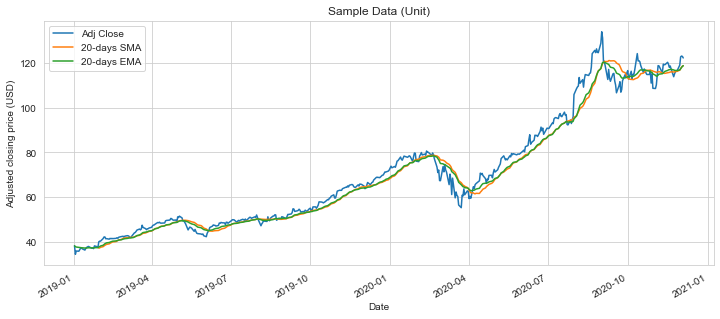

In [14]:
ax = AAPL[['Adj Close','20-days SMA','20-days EMA']].plot(subplots=False,figsize=(12,5),title="Sample Data (Unit)")
ax.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

In the graph above, the number of time periods used in each average is identical–20–but the EMA responds more quickly to the changing prices than the SMA. You can also observe in the figure that the EMA has a higher value when the price is rising than the SMA (and it falls faster than the SMA when the price is declining). This responsiveness to price changes is the main reason why some traders prefer to use the EMA over the SMA (source: http://www.investopedia.com/terms/m/movingaverage.asp).

# Section 2: Daily return & correlation Analysis <a class="anchor" id="chapter2"></a>

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [15]:
# The daily return column can be created by using the percentage change for the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].head()

Date
2019-01-02         NaN
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
Name: Daily Return, dtype: float64

[Text(0, 0.5, 'Daily percentage change'), Text(0.5, 0, 'Date')]

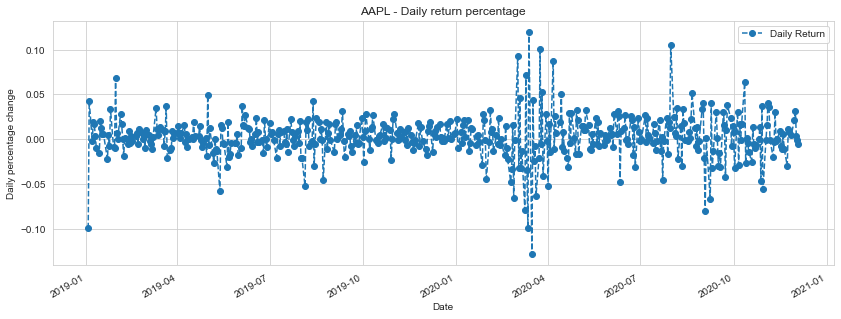

In [16]:
# Then we'll plot the daily return percentage
ax = AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o',title="AAPL - Daily return percentage")
ax.set(xlabel='Date', ylabel='Daily percentage change')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kernel density estimate (KDE) plot on the same figure. A KDE plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve in one or more dimensions.

[Text(0, 0.5, '# of observations'),
 Text(0.5, 0, 'Daily return'),
 Text(0.5, 1.0, 'AAPL - Daily return distribution')]

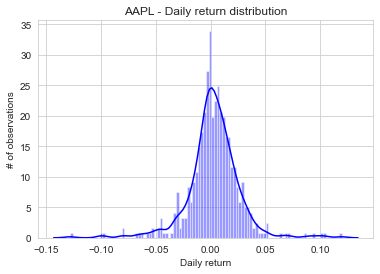

In [17]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
ax = sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')
              
ax.set(xlabel='Daily return', ylabel='# of observations',title="AAPL - Daily return distribution")

# Could have also done:
#AAPL['Daily Return'].hist()

Positive daily returns seem to be slightly more frequent than negative returns for Apple, which makes sense given the historical development of the closing price.

We will make the assumption that the daily returns is normally distributed. Normally distributed variables have a bell-shaped curve which is symmetrical (i.e. half of the data will fall to the left of the mean and half will fall to the right).

## Section 2.1: Correlation between the stocks' daily returns <a class="anchor" id="chapter2.1"></a>

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Adj Close'] columns for each of the stocks dataframes.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN','NFLX','FB'],'yahoo',start_date,end_date)['Adj Close']

In [19]:
# Let's have a quick look
closing_df.tail().round(decimals=2)

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2020-11-30,119.05,1760.74,214.07,3168.04,490.70,276.97
2020-12-01,122.72,1798.10,216.21,3220.08,504.58,286.55
2020-12-02,123.08,1827.95,215.37,3203.53,503.38,287.52
2020-12-03,122.94,1826.77,214.24,3186.73,497.52,281.85
2020-12-04,122.25,1827.99,214.36,3162.58,498.31,279.70


Now that we have all the historical closing prices for the stocks in the same dataframe, we can use Pandas’ pct_change method to calculate the daily returns for each stock (just as we did earlier with Apple). 

In [20]:
# Add a new returns DataFrame
rets_df = closing_df.pct_change()
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544,-0.001343,-0.003024
2020-12-01,0.030827,0.021218,0.009997,0.016427,0.028286,0.034589
2020-12-02,0.002934,0.016601,-0.003885,-0.005140,-0.002378,0.003385
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244,-0.011641,-0.019720
2020-12-04,-0.005613,0.000668,0.000560,-0.007578,0.001588,-0.007628


Now we can move on to analyse the correlation between the stocks daily returns. We will calculate a correlation coefficient to measure the correlation between two stocks. 

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient, but the most popular is Pearson’s. Pearson correlation coefficient (PCC), also referred to as Pearson's r, is a statistic that measures linear correlation between two variables. It has a value between +1 and −1. A value of +1 equals a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

For the Pearson r correlation, both variables should be normally distributed. We have already made the assumption that the daily returns for Apple is normally distributed, and we will make the same assumption for the remainder of the stocks.

In [21]:
# Examples of scatter diagrams with different values of correlation coefficient (ρ)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png", width=500, height=500)

Visit https://en.wikipedia.org/wiki/Pearson_correlation_coefficient for further information about Pearson’s.

First let's see a stock compared to itself. Let's look at Google.

In [22]:
# Let's filter the rets_df to only show the column we're interested in
rets_df['GOOG']

Date
2019-01-02         NaN
2019-01-03   -0.028484
2019-01-04    0.053786
2019-01-07   -0.002167
2019-01-08    0.007385
                ...   
2020-11-30   -0.018096
2020-12-01    0.021218
2020-12-02    0.016601
2020-12-03   -0.000645
2020-12-04    0.000668
Name: GOOG, Length: 487, dtype: float64

When comparing a stock to itself it should show a perfectly linear relationship

Pearson’s correlation coefficient (PCC) is 1.000, and the p-value is 0.000


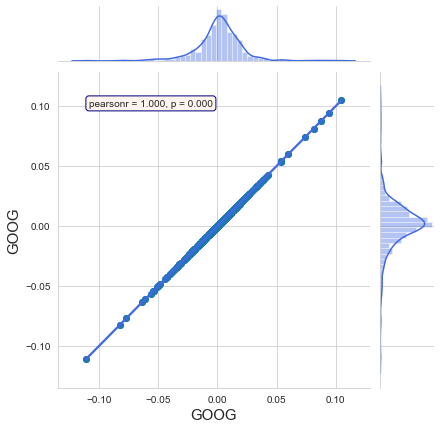

In [23]:
# Code to build a Scatter Plot with Marginal Histograms

stocks = {'a':'GOOG','b':'GOOG'} #Add the tickers for the two stocks you want to compare

a = rets_df[stocks['a']].dropna()
b = rets_df[stocks['b']].dropna()

r, p = stats.pearsonr(a, b)

#print("Pearson’s correlation coefficient is {}".format(np.corrcoef(a, b)[0][1]))

print(f'Pearson’s correlation coefficient (PCC) is {r:.3f}, and the p-value is {p:.3f}')

g = sns.jointplot(x=a, y=b, kind='reg', color='royalblue')

#r, p = stats.pearsonr(a, b)
g.ax_joint.annotate(f'pearsonr = {r:.3f}, p = {p:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'seashell', 'ec': 'navy'})
g.ax_joint.scatter(a, b)
g.set_axis_labels(xlabel=stocks['a'], ylabel=stocks['b'], size=15)
#plt.tight_layout()
#plt.show() 

Here's a suggested user's guide for interpreting the __absolute__ value of r:
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

The graph shows, as expected, a perfectly linear relationship with a PCC of +1. A correlation value of r=1.0 would be a "very strong" positive correlation according to the user guide above. 

Let's instead look at the daily returns for two different stocks. Let's look at Google and Apple.

Pearson’s correlation coefficient (PCC) is 0.705, and the p-value is 0.000


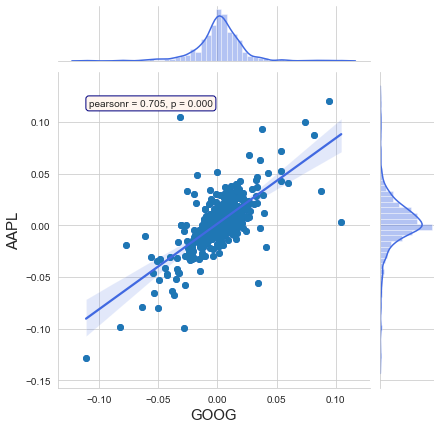

In [24]:
# Code to build a Scatter Plot with Marginal Histograms

stocks = {'a':'GOOG','b':'AAPL'} #Add the tickers for the two stocks you want to compare

a = rets_df[stocks['a']].dropna()
b = rets_df[stocks['b']].dropna()

r, p = stats.pearsonr(a, b)

#print("Pearson’s correlation coefficient is {}".format(np.corrcoef(a, b)[0][1]))

print(f'Pearson’s correlation coefficient (PCC) is {r:.3f}, and the p-value is {p:.3f}')

g = sns.jointplot(x=a, y=b, kind='reg', color='royalblue')

#r, p = stats.pearsonr(a, b)
g.ax_joint.annotate(f'pearsonr = {r:.3f}, p = {p:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'seashell', 'ec': 'navy'})
g.ax_joint.scatter(a, b)
g.set_axis_labels(xlabel=stocks['a'], ylabel=stocks['b'], size=15)
#plt.tight_layout()
#plt.show() 

Google and Apple appears to have a quite strong positive correlation in terms of daily percentage returns. As seen we got a pearsonr of 0.7. Let's have another look at the suggested user's guide for interpreting the __absolute__ value of r:

* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

A correlation value of r=0.7 would be a "strong" positive correlation. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

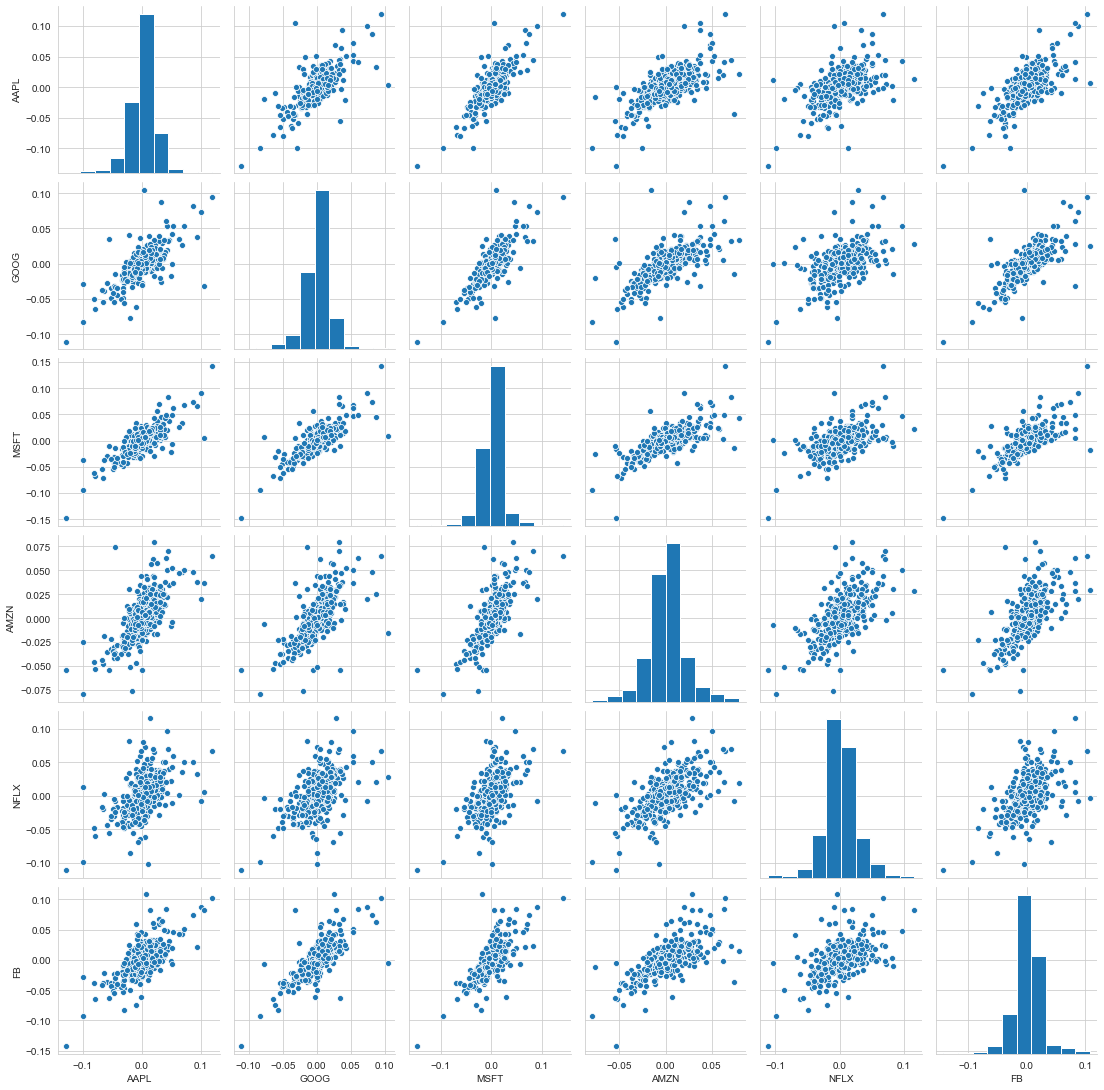

In [25]:
sns.pairplot(rets_df.dropna())

Pairs plots are a powerful tool to quickly explore distributions and relationships in a dataset. Seaborn provides a simple default method for making pair plots that can be customized and extended through the Pair Grid class. 

In contrast to the sns.pairplot function, sns.PairGrid is a class which means that it does not automatically fill in the plots for us. Instead we get full control of the figure. It lets us create and map specific functions to the different sections of the grid (i.e. the diagonal, the upper triangle, and the lower triangle). This is the real benefit of using the PairGrid. For example, we might want to add the PCC between each pair of stocks in the scatterplot. Below is an example of utilizing the full power of seaborn.

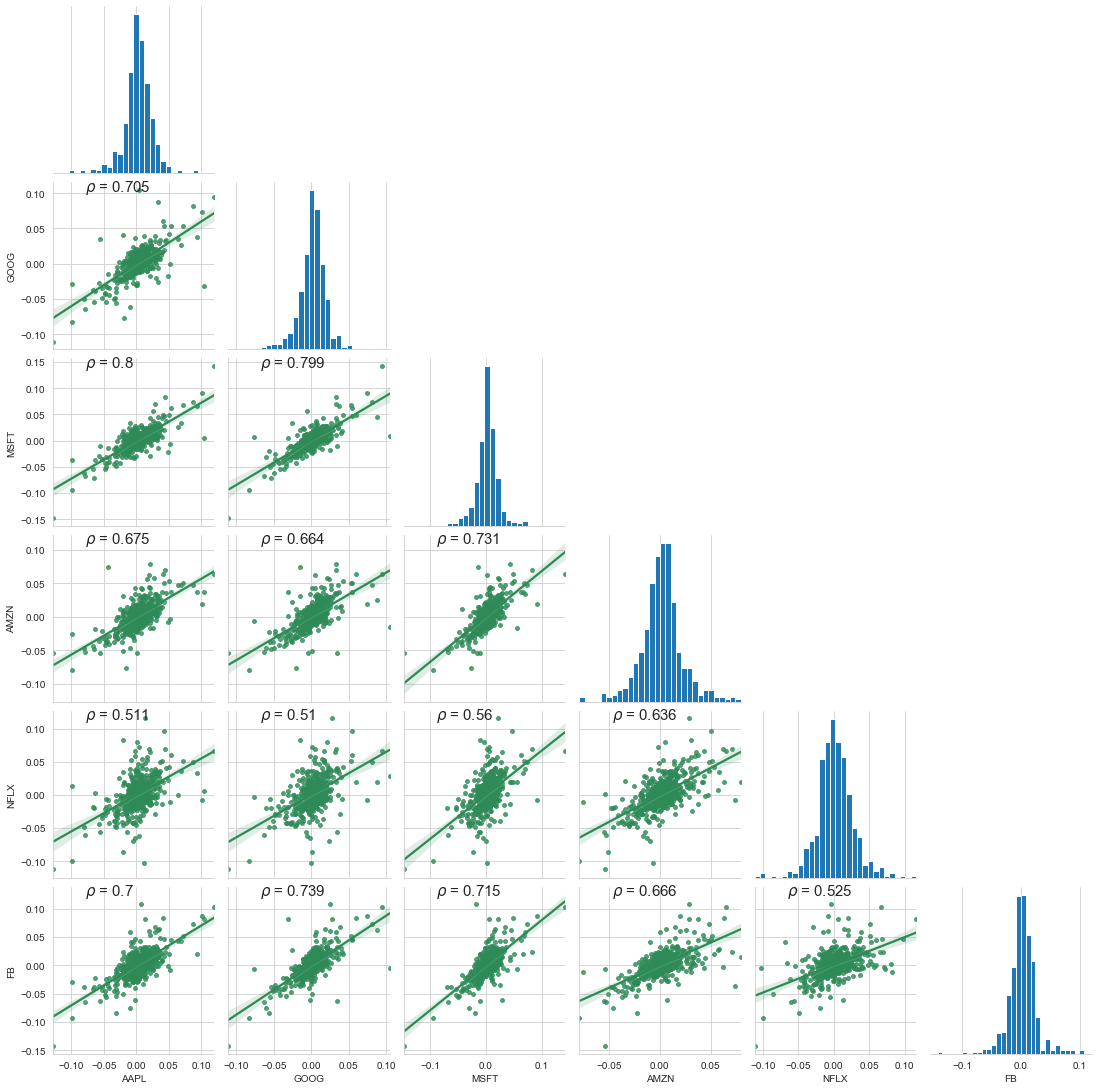

In [26]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 3))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 15, xycoords = ax.transAxes)

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(rets_df.dropna(), diag_sharey=False, corner=True)

# Using map_upper we can specify what the upper triangle will look like.
#returns_fig.map_upper(plt.scatter,color='seagreen')
#returns_fig.map_upper(corr)

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.regplot, color='seagreen', scatter_kws={'s':15})
returns_fig.map_lower(corr)

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Sometimes less really is more. Let's show Pearson’s correlation coefficient between each pair of stocks in a pandas data frame. We can use the style.background_gradient() method of the pandas data frame to add some flavor by adding color to represent the values.

In [27]:
corr_df = rets_df.corr(method='pearson')

corr_df.index.name = None

cm = sns.light_palette("green", as_cmap=True)

(corr_df
 .style
 .background_gradient(cmap=cm)
 .set_precision(3)
 .highlight_max(axis=0,color='lightblue')
)

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
AAPL,1.000,0.705,0.800,0.675,0.511,0.700
GOOG,0.705,1.000,0.799,0.664,0.510,0.739
MSFT,0.800,0.799,1.000,0.731,0.560,0.715
AMZN,0.675,0.664,0.731,1.000,0.636,0.666
NFLX,0.511,0.510,0.560,0.636,1.000,0.525
FB,0.700,0.739,0.715,0.666,0.525,1.000


We can clearly see that the pairs Microsoft-Google and Microsoft-Apple had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Let's move on.

# Section 3: Risk <a class="anchor" id="chapter3"></a>

### How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

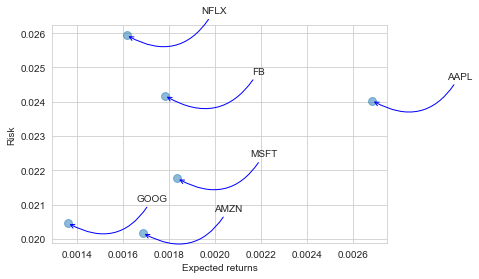

In [28]:
# Let's start by defining a new DataFrame as a clean version of the rets_df DataFrame
rets = rets_df.dropna()

# If you want you can use the following line to set the size of the figure
#plt.figure(figsize=(8,5))

# If you want you can comment out the area definition and set exact x- and y-axis limits
#plt.ylim([0.02,0.026])
#plt.xlim([-0.003,0.004])
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.ylim([0.01,0.025])
#plt.xlim([0.001,0.003])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Add annotatios in the scatterplot. For more information visit the folowing URL: http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle='->', color='blue', connectionstyle = 'arc3,rad=-0.5'))

Obviously, we’d want a stock to have high expected return and a low risk. Microsoft and Amazon seem to be the safe options. Meanwhile, Apple show higher expected returns but with higher risk.

## Section 3.1: Value at Risk <a class="anchor" id="chapter3.1"></a>

Value at risk (VaR) is a statistical risk management technique/metric measuring the maximum loss that an investment portfolio is likely to face with a certain degree of confidence given normal market conditions within a specified time frame. Value at Risk is applicable to all types of assets – bonds, shares, derivatives, currencies, etc. Thus, VaR can be easily used by different banks and financial institutions to assess the profitability and risk of different investments, and allocate risk based on VaR.

For example, if a portfolio of stocks has a one-day 5% VaR of USD 1 million, that means that there is a 0.05 probability that the portfolio will fall in value by more than $1 million over a one-day period if there is no trading.

There are three main methods of calculating VAR: 
* the historical bootstrap method, 
* the variance-covariance method, 
* and the Monte Carlo simulation.



We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We’ll use the ‘Bootstrap’ method and the ‘Monte Carlo Method’ to extract this value.

### Section 3.1.1: Value at Risk using the historical bootstrap method <a class="anchor" id="section3.1.1"></a>

For this method we will calculate the **empirical quantiles** from a histogram of daily returns. 

Let’s do that for the returns of Apple (in reality, you would look at a longer time horizon, and give more weight to recent activity than to activity several years ago).

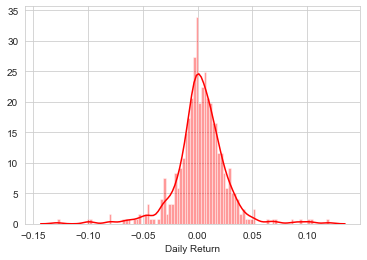

In [29]:
# Seaborn requires us to use dropna() here
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

To recap, our daily returns dataframe (without NaNs) looked like:

In [30]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242,0.013226,-0.029039
2019-01-04,0.042689,0.053786,0.046509,0.050064,0.097234,0.047138
2019-01-07,-0.002226,-0.002167,0.001275,0.034353,0.059717,0.000725
2019-01-08,0.019063,0.007385,0.007251,0.016612,0.015634,0.032452
2019-01-09,0.016982,-0.001505,0.014300,0.001714,-0.000968,0.011927


Lat's Calculate the VaR for 90%, 95%, and 99% confidence levels using the quantile() function

In [31]:
# The 0.05 empirical quantile of daily returns
var_90 = rets['AAPL'].quantile(0.1)
var_95 = rets['AAPL'].quantile(0.05)
var_99 = rets['AAPL'].quantile(0.001)

d = {'Confidence level': ['90%', '95%','99%'], 'Value at Risk': [var_90, var_95, var_99]}
df = pd.DataFrame(data=d)
df['Value at Risk'].round(decimals=3)
df

,Confidence level,Value at Risk
0,90%,-0.020738
1,95%,-0.032150
2,99%,-0.114563


The 0.05 empirical quantile of daily returns is at -0.032. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

### Section 3.1.2: Value at Risk using the variance-covariance method <a class="anchor" id="section3.1.2"></a>

The variance-covariance method is a risk management technique for calculating the VaR of a portfolio of assets that first identifies the mean, or expected value, and standard deviation of an investment portfolio. The method looks at the price movements of investments over a look-back period and uses probability theory to compute a portfolio's maximum loss. Assuming stock price returns and volatility follow a normal distribution, the maximum loss within the specified confidence level is calculated.

Determine the mean and standard deviation of the daily returns. 

In [32]:
returns = AAPL['Daily Return']
mean = returns.mean()
sigma = returns.std()

Plot the normal curve against the daily returns.

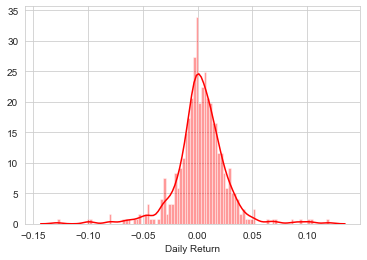

In [33]:
# Seaborn requires us to use dropna() here
sns.distplot(returns.dropna(),bins=100,color='red')

In [34]:
# The 0.05 empirical quantile of daily returns
var_90 = stats.norm.ppf(0.1, mean, sigma)
var_95 = stats.norm.ppf(0.05, mean, sigma)
var_99 = stats.norm.ppf(0.01, mean, sigma)

d = {'Confidence level': ['90%', '95%','99%'], 'Value at Risk': [var_90, var_95, var_99]}
df = pd.DataFrame(data=d)
df['Value at Risk'].round(decimals=3)
df

,Confidence level,Value at Risk
0,90%,-0.028116
1,95%,-0.036848
2,99%,-0.053226


Our analytic 0.05 quantile is at -0.037, so with 95% confidence, our worst daily loss will not exceed 3.7%. For a 1 M€ investment, one-day Value at Risk is 0.037 * 1 M€ = 37 k€.

### Section 3.1.3: Value at Risk using the Monte Carlo method <a class="anchor" id="section3.1.3"></a>

#### How can we attempt to predict future stock behaviour?

One of the most common ways to estimate risk is the use of a Monte Carlo simulation (MCS). For example, to calculate the value at risk (VaR) of a portfolio, we can run a MCS that attempts to predict the worst likely loss for a portfolio given a confidence interval over a specified time horizon (we always need to specify two conditions for VaR: confidence and horizon). 

A MSC is an attempt to predict the future many times over. At the end of the simulation, thousands or millions of "random trials" produce a distribution of outcomes that can be analyzed. In other words, we can use a MSC to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use the Geometric Brownian Motion (GBM), which is technically a Markov process. This means the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.

For more info on how to use Monte Carlo simulation with GBM, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [35]:
# Time horizon
days = 365

# Delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [36]:
# The function takes in starting price, days of simulation, mu and sigma. It returns a simulated price array
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Grate now let's put our function to work! We’re going to run the simulation of Google stocks. Let’s select the initial stock price. I will use the adjusted closing price for the latest available date.

In [37]:
GOOG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,1788.064941,1755.000000,1781.183960,1760.739990,1823800,1760.739990
2020-12-01,1824.829956,1769.369995,1774.369995,1798.099976,1739000,1798.099976
2020-12-02,1835.650024,1789.473022,1798.099976,1827.949951,1222000,1827.949951
2020-12-03,1847.199951,1822.650024,1824.010010,1826.770020,1227300,1826.770020
2020-12-04,1833.160034,1816.989990,1824.520020,1827.989990,1376100,1827.989990


In [38]:
GOOG['Adj Close'].tail(1)[0]

1827.989990234375

In [39]:
Open_price = round(GOOG['Adj Close'].tail(1)[0],ndigits=2)
Open_price

1827.99

Let’s do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

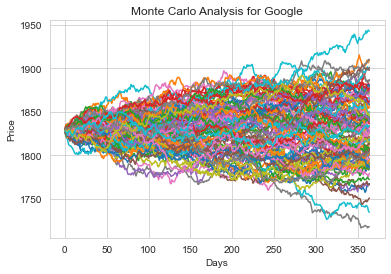

In [40]:
# Get start price from GOOG.head()
start_price = Open_price

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. Let’s do a simulation of 10.000 runs.

In [41]:
# Set a large numebr of runs
runs = 10_000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

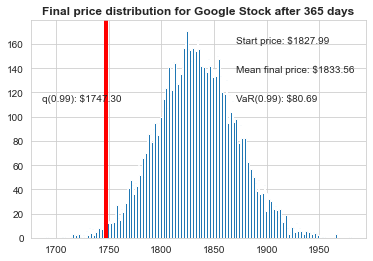

In [42]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

We have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock. The red line indicates the value of stock at risk at the desired confidence interval. For every Google stock we’d be risking $80.69 99% of the time from our Monte Carlo Simulation.

Crucially, Monte Carlo simulations ignore everything that is not built into the price movement (macro trends, company leadership, hype, cyclical factors); in other words, they assume perfectly efficient markets.